In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# files to read => chb01_03.edf, chb01_04.edf, chb01_15.edf,  chb01_16.edf,  chb01_18.edf,  chb01_21.edf,  chb01_26.edf,  chb02_16.edf, chb02_19.edf, chb03_01.edf, chb03_02.edf, chb03_03.edf, chb03_04.edf
files_to_read = [
        'chb01_03.edf',
        'chb01_04.edf',
        'chb01_15.edf',
        'chb01_16.edf',
        'chb01_18.edf',
        'chb01_21.edf',
        'chb01_26.edf',
        'chb02_16.edf',
        'chb02_19.edf',
        'chb03_01.edf',
        'chb03_02.edf',
        'chb03_03.edf',
        'chb03_04.edf',
        'chb04_05.edf',
        'chb04_28.edf',
        'chb05_06.edf',
        'chb05_13.edf',
        'chb05_16.edf',
        'chb05_17.edf',
        'chb05_22.edf',
        'chb06_04.edf',
        'chb06_09.edf',
        'chb06_10.edf',
        'chb06_13.edf',
        'chb06_18.edf',
        'chb06_24.edf',
        'chb07_12.edf',
        'chb07_13.edf',
        'chb07_19.edf',
        'chb08_02.edf',
        'chb08_05.edf',
        'chb08_11.edf',
        'chb08_13.edf',
        'chb08_21.edf',
        'chb09_06.edf',
        'chb09_08.edf',
        'chb09_19.edf',
        'chb10_12.edf',
        'chb10_20.edf',
        'chb10_27.edf',
        'chb10_30.edf',
        'chb10_31.edf',
        'chb10_38.edf',
        'chb10_89.edf',
        ]
seizure_seconds_each_file_start_and_end_seconds = [
        ('chb01_03.edf',2996, 3036),
        ('chb01_04.edf', 1467, 1494),
        ('chb01_15.edf', 1732, 1772),
        ('chb01_16.edf',1015, 1066),
        ('chb01_18.edf', 1720, 1810),
        ('chb01_21.edf', 327, 420),
        ('chb01_26.edf', 1862, 1963),
        ('chb02_16.edf', 130, 212),
        ('chb02_19.edf', 2972, 3053),
        ('chb03_01.edf', 362, 414),
        ('chb03_02.edf', 731, 796),
        ('chb03_03.edf', 432, 501),
        ('chb03_04.edf', 2162, 2214),
        ('chb04_05.edf', 7804, 7853),
        ('chb04_28.edf', 1679, 1781),
        ('chb05_06.edf', 417, 532),
        ('chb05_13.edf', 1086, 1196),
        ('chb05_16.edf', 2317, 2413),
        ('chb05_17.edf', 2451, 2571),
        ('chb05_22.edf', 2348, 2465),
        ('chb06_04.edf', 327, 347),
        ('chb06_09.edf', 12500, 12516),
        ('chb06_10.edf', 10833, 10845),
        ('chb06_13.edf', 506, 519),
        ('chb06_18.edf', 7799, 7811),
        ('chb06_24.edf', 9387, 9403),
        ('chb07_12.edf', 4920, 5006),
        ('chb07_13.edf', 3285, 3381),
        ('chb07_19.edf', 13688, 13831),
        ('chb08_02.edf', 2670, 2841),
        ('chb08_05.edf', 2856, 3046),
        ('chb08_11.edf', 2988, 3122),
        ('chb08_13.edf', 2417, 2577),
        ('chb08_21.edf', 2083, 2347),
        ('chb09_06.edf', 12231, 12295),
        ('chb09_08.edf', 2951, 3030),
        ('chb09_19.edf', 5299, 5361),
        ('chb10_12.edf', 6313, 6348),
        ('chb10_20.edf', 6888, 6958),
        ('chb10_27.edf', 2382, 2447),
        ('chb10_30.edf', 3021, 3079),
        ('chb10_31.edf', 3801, 3877),
        ('chb10_38.edf', 4618, 4707),
        ('chb10_89.edf', 1383, 1437),
        ]
signals = []

for file in files_to_read:
        f = pyedflib.EdfReader(file)
        n = f.signals_in_file
        signal_labels = f.getSignalLabels()
        fz_cz_index = signal_labels.index('FZ-CZ')
        cz_pz_index = signal_labels.index('CZ-PZ')
        sigbufs = np.zeros((2, f.getNSamples()[0]))
        sigbufs[0] = f.readSignal(fz_cz_index)
        sigbufs[1] = f.readSignal(cz_pz_index)
        signals.append(np.array(sigbufs))
        f.close()
print(len(signals), len(files_to_read), len(seizure_seconds_each_file_start_and_end_seconds))

44 44 44


In [3]:
signals[0].shape

(2, 921600)

In [4]:
shortened_signals = signals[0:18]

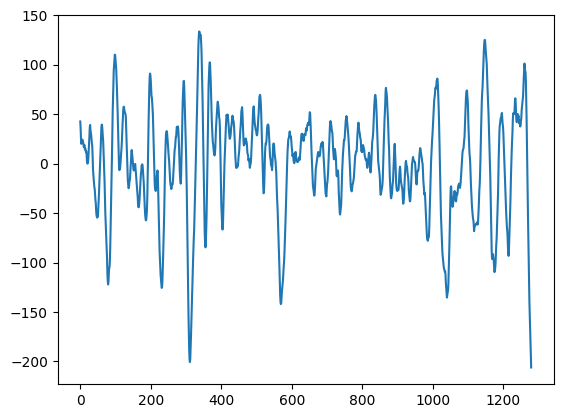

In [5]:
#plot the signal of first file from start seizure time to end seizure time
plt.plot(signals[0][0][2996*256:3001*256])

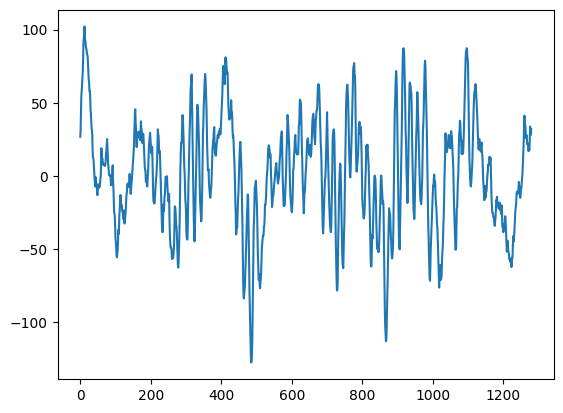

In [6]:
plt.plot(signals[1][0][500*256:505*256])

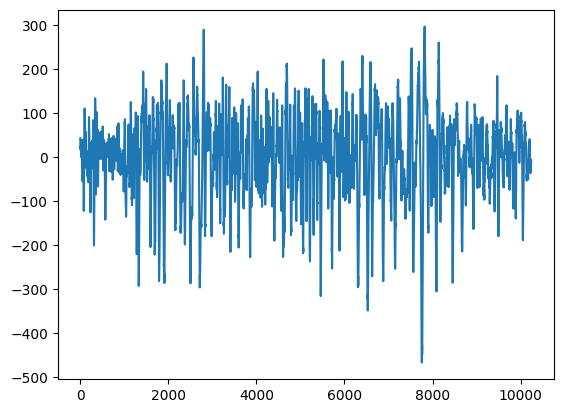

In [7]:
#plot the signal of first file from start seizure time to end seizure time
plt.plot(signals[0][0][2996*256:3036*256])

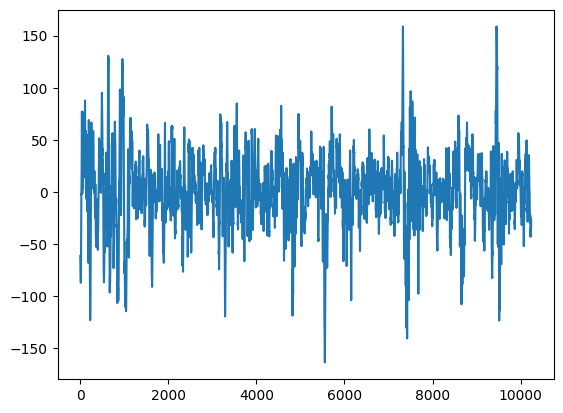

In [8]:
plt.plot(signals[0][0][2700*256:2740*256])

In [9]:
#loop only in seizure time

window_size = 5 * 256
seizure_data_signals = np.zeros((0, 2, window_size))
seizure_data_y_labels = []

for i in range(len(shortened_signals)):
    try:
        start_time = seizure_seconds_each_file_start_and_end_seconds[i][1]*256
        end_time = seizure_seconds_each_file_start_and_end_seconds[i][2]*256
        for j in range(start_time, end_time, 256):
            seizure_data_signals = np.append(seizure_data_signals, np.array([shortened_signals[i][:, j:j+window_size]]), axis=0)
            seizure_data_y_labels.append(1)
    except:
        print("error in file:")
        print(i)
        continue
len(seizure_data_y_labels)

1315

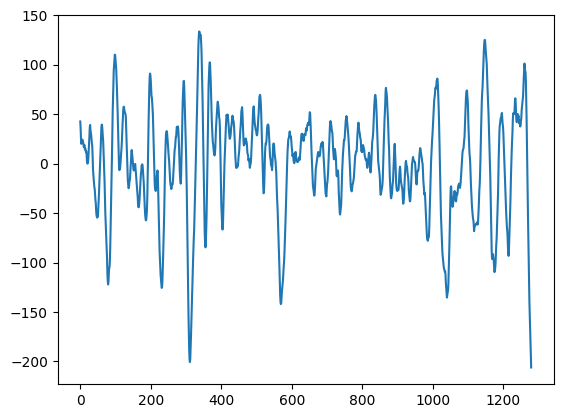

In [10]:
plt.plot(seizure_data_signals[0][0])

In [15]:
#delete the first 5 percent and last 5 percent of the signal
import copy
new_signals = copy.deepcopy(shortened_signals)
for i in range(len(new_signals)):
    new_signals[i] = new_signals[i][:,int(0.05*len(new_signals[i][0])):int(0.95*len(new_signals[i][0]))]

In [16]:
#delete the seizure time from the signals
for i in range(len(new_signals)):
    try:
        start_time = seizure_seconds_each_file_start_and_end_seconds[i][1]*256
        end_time = seizure_seconds_each_file_start_and_end_seconds[i][2]*256
        new_signals[i] = np.delete(new_signals[i], np.s_[start_time:end_time], axis=1)
    except:
        print("error in file:")
        print(i)
        continue

In [17]:
print(new_signals[0].shape, shortened_signals[0].shape)

(2, 819200) (2, 921600)


In [18]:
#peek 5000 random samples from the signals
import random
non_seizure_data_signals = np.zeros((0, 2, window_size))
non_seizure_data_y_labels = []

for i in range(len(new_signals)):
    for j in range(120):
        random_index = random.randint(0, len(new_signals[i][0])-window_size)
        non_seizure_data_signals = np.append(non_seizure_data_signals, np.array([new_signals[i][:, random_index:random_index+window_size]]), axis=0)
        non_seizure_data_y_labels.append(0)

len(non_seizure_data_y_labels)

2160

In [19]:
non_seizure_data_signals.shape

(2160, 2, 1280)

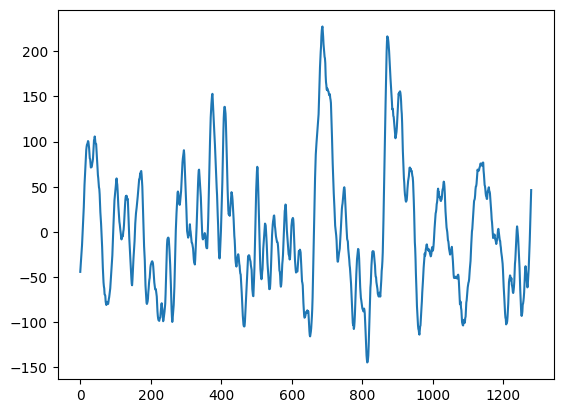

In [20]:
plt.plot(non_seizure_data_signals[0][0])

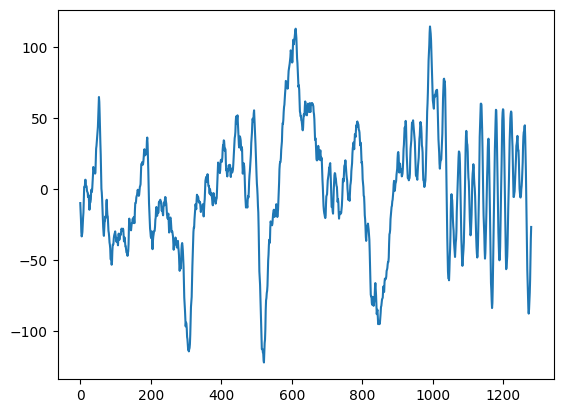

In [21]:
plt.plot(non_seizure_data_signals[450][0])

In [22]:
final_signals =np.zeros((0, 2, window_size))
final_y_labels = []

In [23]:
final_signals = np.append(seizure_data_signals, non_seizure_data_signals, axis=0)
final_y_labels = np.append(seizure_data_y_labels, non_seizure_data_y_labels, axis=0)

In [24]:
print(final_signals.shape, final_y_labels.shape)

(3475, 2, 1280) (3475,)


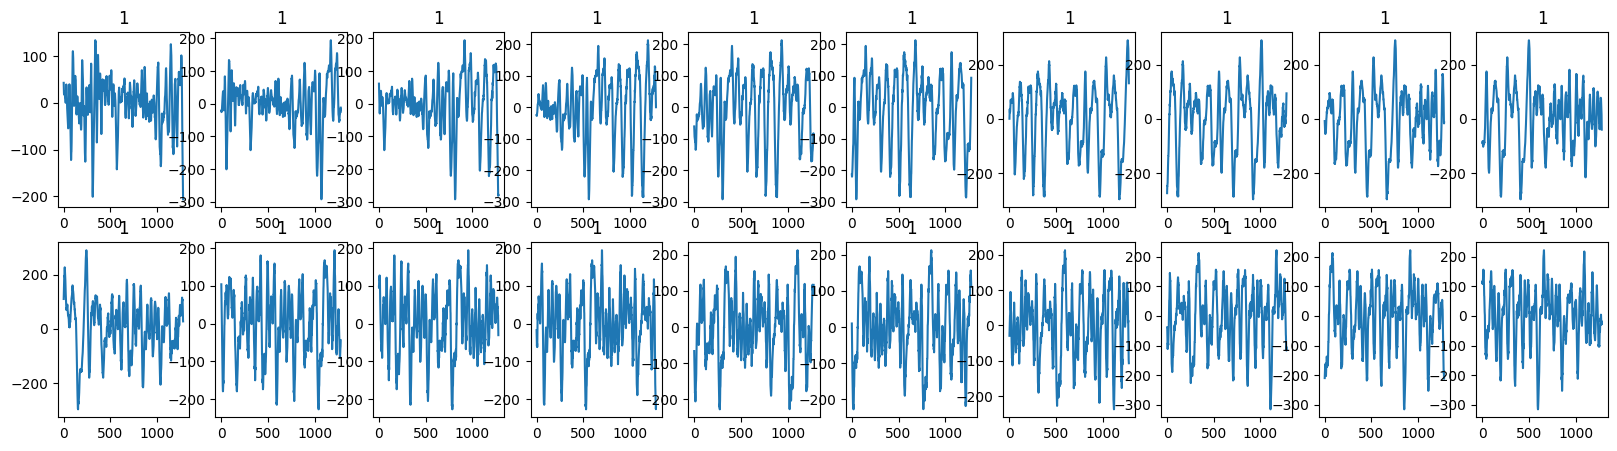

In [25]:
#plot 10 signals with label 1 and 10 signals with label 0 in a grid of small plots
fig, axs = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    axs[0, i].plot(final_signals[i][0])
    axs[0, i].set_title(final_y_labels[i])
    axs[1, i].plot(final_signals[i+10][0])
    axs[1, i].set_title(final_y_labels[i+10])

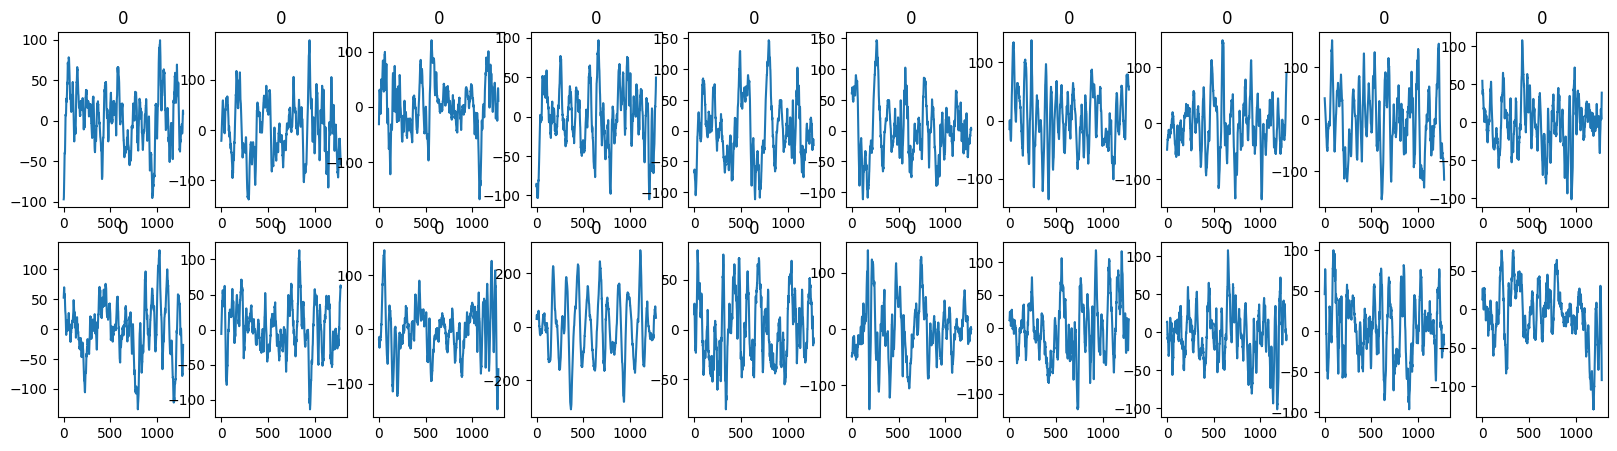

In [26]:
#plot 10 signals from last of the array
fig, axs = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    axs[0, i].plot(final_signals[-i-1][0])
    axs[0, i].set_title(final_y_labels[-i-1])
    axs[1, i].plot(final_signals[-i-11][0])
    axs[1, i].set_title(final_y_labels[-i-11])

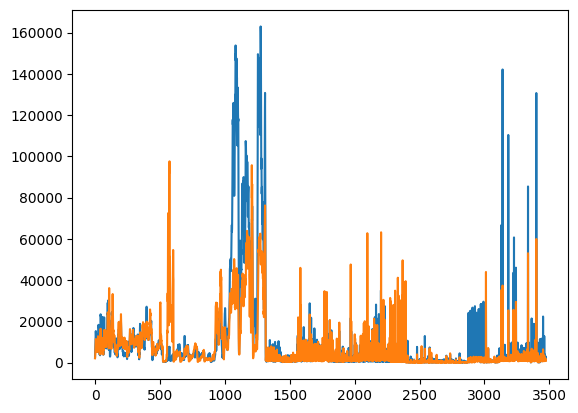

In [27]:
var = np.var(final_signals, axis=2)
plt.plot(var)

In [28]:
fft = np.fft.fft(final_signals, axis=2)
fft.shape

(3475, 2, 1280)

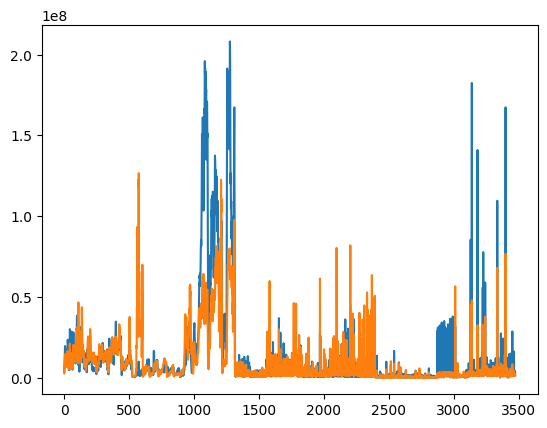

In [29]:
fft_var = np.var(fft, axis=2)
plt.plot(fft_var)

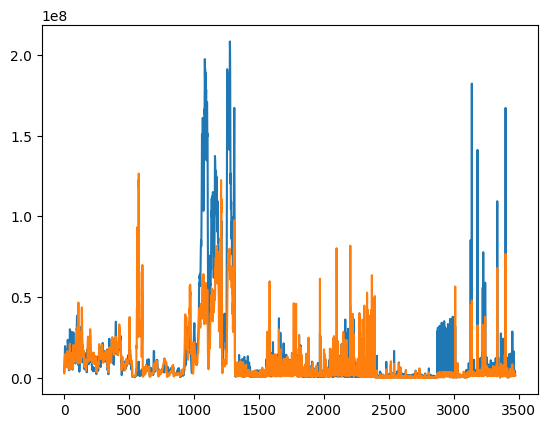

In [30]:
energy = np.sum(np.square(final_signals), axis=2)
plt.plot(energy)

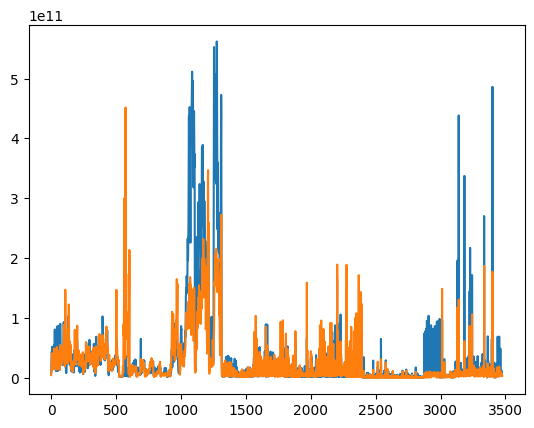

In [31]:
#complexity
complexity = np.sum(np.square(np.abs(np.diff(fft, axis=2))), axis=2)
plt.plot(complexity)

In [34]:
features = np.concatenate((var, fft_var, energy, complexity), axis=1)
features.shape

(3475, 8)

In [35]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 


#split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(features, final_y_labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

0.8503597122302158


array([[378,  38],
       [ 66, 213]], dtype=int64)

In [36]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

#use just one channel of the signals
final_signals_one_channel = final_signals[:, 0, :]

#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(final_signals_one_channel, final_y_labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
#confusion matrix
confusion_matrix(y_test, y_pred)

0.7165467625899281


array([[409,   7],
       [190,  89]], dtype=int64)

In [37]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(final_signals, final_y_labels, test_size=0.2, random_state=42)

In [38]:
X_train.shape

(2780, 2, 1280)

In [39]:
#one hot encode target column
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# big model(the best one)

In [40]:
#now lets make the model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=10, activation='relu', input_shape=(window_size, 2)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(filters=128, kernel_size=10, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(filters=64, kernel_size=10, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
#add our features to the last fully connected layer
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1271, 256)         5376      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 635, 256)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 635, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 626, 128)          327808    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 313, 128)         0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 313, 128)          0

In [ ]:
X_train, X_test, y_train_categorical, y_test_categorical = train_test_split(features, y_train_categorical, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

# small model (not a good model)

In [41]:
#now lets build a model our filters should get every 2 seconds of data
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 2)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(features.shape[1], activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1279, 64)          320       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 639, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 40896)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                 327176    
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 327,514
Trainable params: 327,514
Non-trainable params: 0
________________________________________________

In [41]:
X_train = X_train.reshape(X_train.shape[0], window_size, 2)
X_test = X_test.reshape(X_test.shape[0], window_size, 2)

In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape

(2780, 1280, 2)

In [43]:
X_train.shape

(2780, 1280, 2)

In [44]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=20,
    shuffle=True,
    verbose=2,
)

Epoch 1/20
87/87 - 56s - loss: 2.6927 - accuracy: 0.5388 - 56s/epoch - 638ms/step
Epoch 2/20
87/87 - 48s - loss: 0.6534 - accuracy: 0.6360 - 48s/epoch - 552ms/step
Epoch 3/20
87/87 - 48s - loss: 0.6048 - accuracy: 0.7277 - 48s/epoch - 557ms/step
Epoch 4/20
87/87 - 51s - loss: 0.5536 - accuracy: 0.7813 - 51s/epoch - 587ms/step
Epoch 5/20
87/87 - 47s - loss: 0.5256 - accuracy: 0.8101 - 47s/epoch - 545ms/step
Epoch 6/20
87/87 - 47s - loss: 0.4961 - accuracy: 0.8115 - 47s/epoch - 538ms/step
Epoch 7/20
87/87 - 50s - loss: 0.4561 - accuracy: 0.8245 - 50s/epoch - 572ms/step
Epoch 8/20
87/87 - 49s - loss: 0.4116 - accuracy: 0.8478 - 49s/epoch - 569ms/step
Epoch 9/20
87/87 - 48s - loss: 0.4044 - accuracy: 0.8363 - 48s/epoch - 547ms/step
Epoch 10/20
87/87 - 49s - loss: 0.4163 - accuracy: 0.8227 - 49s/epoch - 567ms/step
Epoch 11/20
87/87 - 49s - loss: 0.3399 - accuracy: 0.8676 - 49s/epoch - 564ms/step
Epoch 12/20
87/87 - 49s - loss: 0.3059 - accuracy: 0.8781 - 49s/epoch - 561ms/step
Epoch 13/20
8

In [45]:
#evaluate the model
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

22/22 - 3s - loss: 0.2791 - accuracy: 0.8950 - 3s/epoch - 147ms/step
Normal Neural Network - Loss: 0.2791128158569336, Accuracy: 0.8949640393257141


In [46]:
#model recall and f1 score and precision
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_categorical, axis=1)
print(classification_report(y_test, y_pred))

22/22 [==============================] - 3s 144ms/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       416
           1       0.89      0.84      0.87       279

    accuracy                           0.89       695
   macro avg       0.89      0.89      0.89       695
weighted avg       0.89      0.89      0.89       695



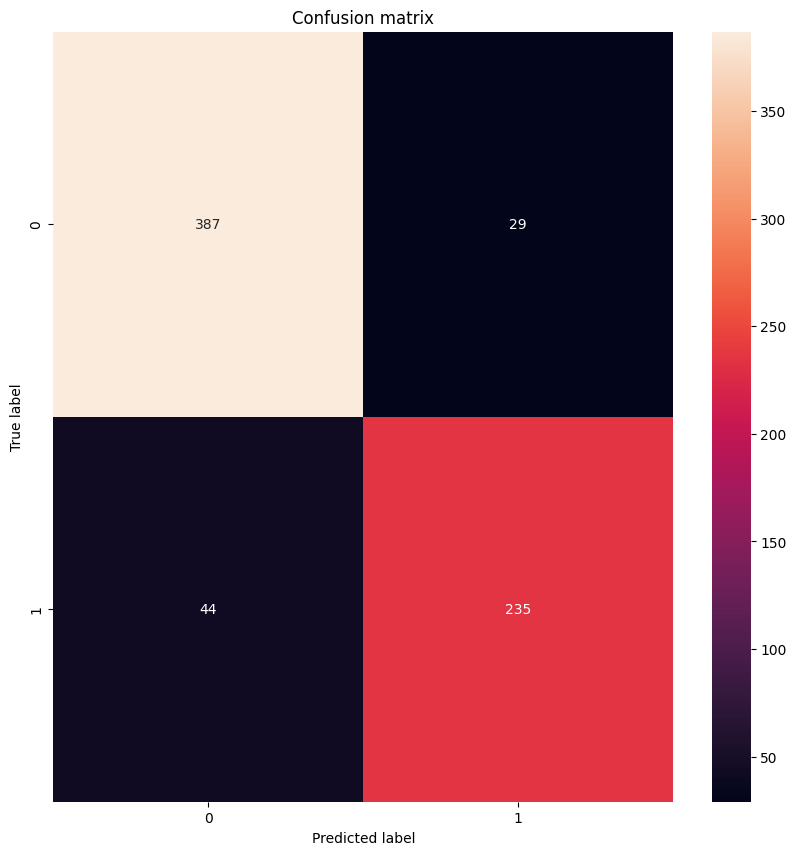

In [48]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
#false alarm rate
false_alarm_rate = cm[0][1]/(cm[0][1]+cm[1][1])
print("false alarm rate: ", false_alarm_rate)

#missed detection rate
missed_detection_rate = cm[1][0]/(cm[1][0]+cm[0][0])
print("missed detection rate: ", missed_detection_rate)

false alarm rate:  0.10984848484848485
missed detection rate:  0.10208816705336426


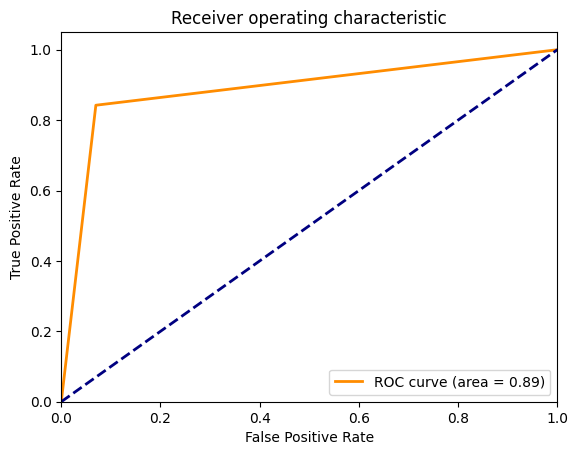

In [50]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [68]:
#test our file at index 20 and see if our model can predict the start and end of the seizure
test_signal = signals[20]
test_signal.shape

(2, 921600)

In [69]:
test_signal = test_signal.T

In [70]:
seizure_seconds_each_file_start_and_end_seconds[20]

('chb05_22.edf', 2348, 2465)

In [71]:
#delete the first 5% and last 5% of the signal
test_signal = test_signal[0: int(len(test_signal)*0.95)]
test_signal = test_signal[int(len(test_signal)*0.05):]
test_signal.shape

(831744, 2)

In [79]:
#loop through the signal and predict every window_size seconds
signals_window_size = 256 * 5
predictions = []
seizure_times = []
for i in range(0, test_signal.shape[0], signals_window_size):
    try:
        #get the window
        window = test_signal[i:i+signals_window_size]
        #reshape the window
        window = window.reshape(1, signals_window_size, 2)
        #predict the window
        prediction = model.predict(window)
        #get the prediction
        prediction = np.argmax(prediction, axis=1)
        #append the prediction
        predictions.append(prediction)
        if prediction == 1:
            print("start time: ", i)
            print("end time: ", i+signals_window_size)
            seizure_times.append((i/256, (i+signals_window_size)/256))
    except:
        continue
#convert the predictions to a numpy array
predictions = np.array(predictions)
predictions.shape

1/1 [==============================] - 0s 41ms/step
start time:  3840
end time:  5120
1/1 [==============================] - 0s 31ms/step
start time:  14080
end time:  15360
1/1 [==============================] - 0s 27ms/step
start time:  38400
end time:  39680
1/1 [==============================] - 0s 31ms/step
start time:  52480
end time:  53760
1/1 [==============================] - 0s 27ms/step
start time:  65280
end time:  66560
1/1 [==============================] - 0s 31ms/step
start time:  76800
end time:  78080
1/1 [==============================] - 0s 77ms/step
start time:  78080
end time:  79360
1/1 [==============================] - 0s 29ms/step
start time:  83200
end time:  84480
1/1 [==============================] - 0s 24ms/step
start time:  84480
end time:  85760
1/1 [==============================] - 0s 22ms/step
start time:  85760
end time:  87040
1/1 [==============================] - 0s 33ms/step
start time:  87040
end time:  88320
1/1 [=============================

(649, 1)

In [80]:
seizure_times

[(15.0, 20.0),
 (55.0, 60.0),
 (150.0, 155.0),
 (205.0, 210.0),
 (255.0, 260.0),
 (300.0, 305.0),
 (305.0, 310.0),
 (325.0, 330.0),
 (330.0, 335.0),
 (335.0, 340.0),
 (340.0, 345.0),
 (350.0, 355.0),
 (370.0, 375.0),
 (385.0, 390.0),
 (420.0, 425.0),
 (440.0, 445.0),
 (465.0, 470.0),
 (515.0, 520.0),
 (525.0, 530.0),
 (535.0, 540.0),
 (540.0, 545.0),
 (555.0, 560.0),
 (575.0, 580.0),
 (585.0, 590.0),
 (595.0, 600.0),
 (615.0, 620.0),
 (630.0, 635.0),
 (645.0, 650.0),
 (650.0, 655.0),
 (680.0, 685.0),
 (720.0, 725.0),
 (730.0, 735.0),
 (740.0, 745.0),
 (745.0, 750.0),
 (755.0, 760.0),
 (760.0, 765.0),
 (765.0, 770.0),
 (775.0, 780.0),
 (790.0, 795.0),
 (800.0, 805.0),
 (805.0, 810.0),
 (850.0, 855.0),
 (875.0, 880.0),
 (900.0, 905.0),
 (910.0, 915.0),
 (955.0, 960.0),
 (975.0, 980.0),
 (980.0, 985.0),
 (1095.0, 1100.0),
 (1160.0, 1165.0),
 (1185.0, 1190.0),
 (1195.0, 1200.0),
 (1200.0, 1205.0),
 (1255.0, 1260.0),
 (1265.0, 1270.0),
 (1305.0, 1310.0),
 (1430.0, 1435.0),
 (1455.0, 1460.0)

In [54]:
# #data augmentation

#flip the signal
flipped_signals = np.flip(final_signals, axis=2)
flipped_y_labels = final_y_labels

# #add noise
noise = np.random.normal(0, 0.1, final_signals.shape)
noisy_signals = final_signals + noise
noisy_y_labels = final_y_labels

#concatenate the original, flipped and noisy signals
augmented_signals = np.append(final_signals, flipped_signals, axis=0)
augmented_signals = np.append(augmented_signals, noisy_signals, axis=0)
augmented_y_labels = np.append(final_y_labels, flipped_y_labels, axis=0)
augmented_y_labels = np.append(augmented_y_labels, noisy_y_labels, axis=0)

print(augmented_signals.shape, augmented_y_labels.shape)

(10425, 2, 1280) (10425,)


In [55]:
#normalize the data
augmented_signals = augmented_signals / np.max(augmented_signals)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(augmented_signals, augmented_y_labels, test_size=0.2, random_state=42)

In [57]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [60]:
X_train = X_train.reshape(X_train.shape[0], window_size, 2)
X_test = X_test.reshape(X_test.shape[0], window_size, 2)

## lets build a model that haves our features that we extracted

In [100]:
X_train.shape

(2780, 1280, 2)

In [114]:
features_train, features_test, y_train, y_test = train_test_split(features, final_y_labels, test_size=0.2, random_state=42)

In [130]:
from keras.layers import Input, Concatenate
from keras.models import Model


signal_inputs = Input(shape=(window_size, 2), name="signal_inputs")
features_inputs = Input(shape=(features.shape[1],), name="features_inputs")

signals_model = Conv1D(filters=256, kernel_size=2, activation='relu')(signal_inputs)
signals_model = MaxPooling1D(pool_size=2)(signals_model)
# signals_model = Dropout(0.3)(signals_model)
signals_model = Conv1D(filters=128, kernel_size=2, activation='relu')(signals_model)
signals_model = MaxPooling1D(pool_size=2)(signals_model)
# signals_model = Dropout(0.3)(signals_model)
# signals_model = Conv1D(filters=64, kernel_size=2, activation='relu')(signals_model)
# signals_model = MaxPooling1D(pool_size=2)(signals_model)
# signals_model = Dropout(0.3)(signals_model)
signals_model = Flatten()(signals_model)
signals_model = Dense(features.shape[1], activation='relu')(signals_model)

features_model = Dense(features.shape[1], activation='relu', name="feature_inputs", trainable=False)(features_inputs)

combined = Concatenate()([signals_model, features_model])

combined = Dense(2, activation='softmax')(combined)

model = Model(inputs=[signal_inputs, features_inputs], outputs=combined)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 signal_inputs (InputLayer)     [(None, 1280, 2)]    0           []                               
                                                                                                  
 conv1d_21 (Conv1D)             (None, 1279, 256)    1280        ['signal_inputs[0][0]']          
                                                                                                  
 max_pooling1d_21 (MaxPooling1D  (None, 639, 256)    0           ['conv1d_21[0][0]']              
 )                                                                                                
                                                                                                  
 dropout_15 (Dropout)           (None, 639, 256)     0           ['max_pooling1d_21[0][0]'] 

In [131]:
model.fit(
    [X_train, features_train],
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2,
)

Epoch 1/10
87/87 - 28s - loss: 759775680.0000 - accuracy: 0.4144 - 28s/epoch - 326ms/step
Epoch 2/10
87/87 - 27s - loss: 389082528.0000 - accuracy: 0.4565 - 27s/epoch - 308ms/step
Epoch 3/10
87/87 - 31s - loss: 153668096.0000 - accuracy: 0.7104 - 31s/epoch - 360ms/step
Epoch 4/10
87/87 - 30s - loss: 117489024.0000 - accuracy: 0.7691 - 30s/epoch - 346ms/step
Epoch 5/10
87/87 - 27s - loss: 106418288.0000 - accuracy: 0.7658 - 27s/epoch - 316ms/step
Epoch 6/10


In [126]:
#evaluate the model
model_loss, model_accuracy = model.evaluate(
    [X_test, features_test], y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
    

22/22 - 0s - loss: 58662796.0000 - accuracy: 0.5971 - 334ms/epoch - 15ms/step
Normal Neural Network - Loss: 58662796.0, Accuracy: 0.597122311592102


In [127]:
#model recall and f1 score and precision
from sklearn.metrics import classification_report

y_pred = model.predict([X_test, features_test])
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_categorical, axis=1)
print(classification_report(y_test, y_pred))

22/22 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       416
           1       0.33      0.00      0.01       279

    accuracy                           0.60       695
   macro avg       0.47      0.50      0.38       695
weighted avg       0.49      0.60      0.45       695



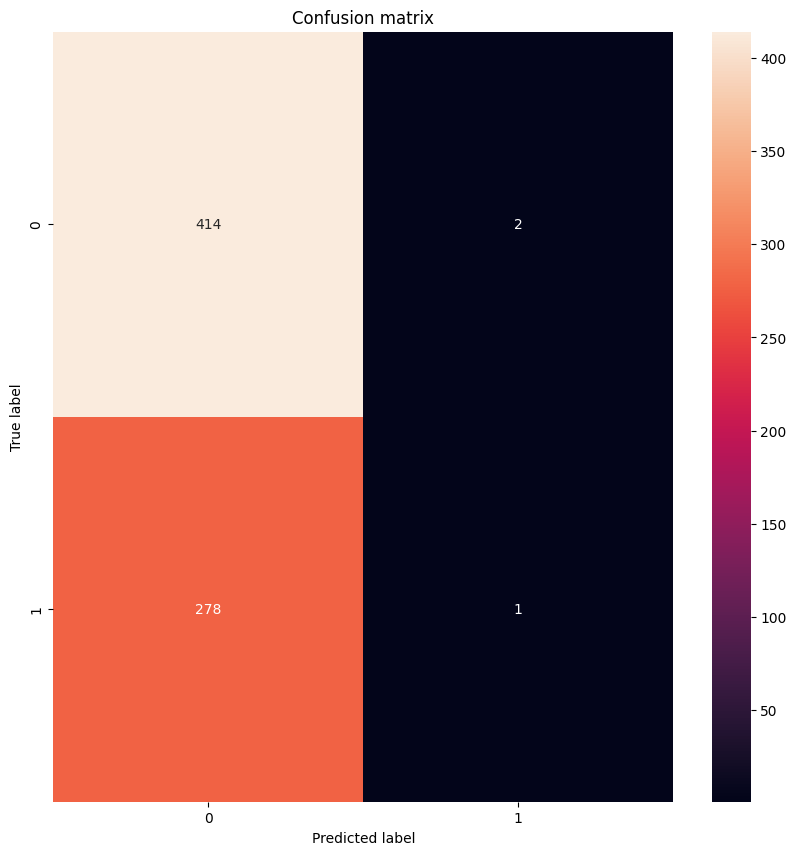

In [128]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()